In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
import datetime as dt
import numpy as np
from bokeh.plotting import show
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import tree 

import seaborn as sns
sns.set_style("ticks")
sns.set_context("notebook", rc={"lines.linewidth": 2})

import statistics as stat
import random
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

pd.set_option("display.max_columns", None)

# <span style='color:green'> **[done]** </span>Loading Features data

In [100]:
loc = "C:/Users/sagic/[2] UFC_Predictor/data/"
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.head()

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,win,Ciryl Gane,Tai Tuivasa,2022-09-03,Heavyweight,KO/TKO:Punches,-0.001214,3.030277,0.016160,0.009864,0.367383,0.737850,0.104590,0.487884,0.630393,0.738157,-1.209225,1.422782,-1.103479,0.437791,-2.845566,1.079323
1,lose,Marvin Vettori,Robert Whittaker,2022-09-03,Middleweight,U-DEC:,-0.001214,-1.558783,-0.378812,0.009864,0.618005,0.249333,-0.330071,0.583092,-0.171131,0.171314,0.201202,-0.172641,1.722088,-0.234832,0.596560,-1.076104
2,win,Nassourdine Imavov,Joaquin Buckley,2022-09-03,Middleweight,U-DEC:,-0.001214,0.171518,0.806103,1.703673,-0.200694,-0.239183,0.338638,2.296840,0.302210,1.790865,-0.598650,0.667055,-1.103479,0.358659,-0.550816,0.001609
3,lose,Alessio Di Chirico,Roman Kopylov,2022-09-03,Middleweight,KO/TKO:Punches,-1.355760,-0.768863,0.016160,0.009864,0.629144,0.214439,-0.129458,0.011842,-0.070152,-0.395529,-0.220094,0.079268,-1.103479,0.061913,0.022872,-1.076104
4,win,William Gomis,Jarno Errens,2022-09-03,Featherweight,U-DEC:,-0.001214,0.434825,1.201074,-0.837040,1.692895,2.098718,2.010413,-0.940240,0.510480,0.657179,-0.482641,0.667055,1.722088,1.980868,0.022872,0.001609


# <span style='color:green'> **[done]** </span> Y feature Binary encoding

In [101]:
i = 0
df['f_win'] = None

for item in df.result:
    if item == 'win':
        df.loc[i,'f_win'] = 1
    else:
        df.loc[i,'f_win'] = 0
    i += 1

y = df['f_win']
df.head(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,f_win
0,win,Ciryl Gane,Tai Tuivasa,2022-09-03,Heavyweight,KO/TKO:Punches,-0.001214,3.030277,0.016160,0.009864,0.367383,0.737850,0.104590,0.487884,0.630393,0.738157,-1.209225,1.422782,-1.103479,0.437791,-2.845566,1.079323,1
1,lose,Marvin Vettori,Robert Whittaker,2022-09-03,Middleweight,U-DEC:,-0.001214,-1.558783,-0.378812,0.009864,0.618005,0.249333,-0.330071,0.583092,-0.171131,0.171314,0.201202,-0.172641,1.722088,-0.234832,0.596560,-1.076104,0
2,win,Nassourdine Imavov,Joaquin Buckley,2022-09-03,Middleweight,U-DEC:,-0.001214,0.171518,0.806103,1.703673,-0.200694,-0.239183,0.338638,2.296840,0.302210,1.790865,-0.598650,0.667055,-1.103479,0.358659,-0.550816,0.001609,1


# <span style='color:green'> **[done]** </span> Splitting data to Training set/Test set:

In [102]:
def set_train_test(X_columns, y_column, data=df, test_size=0.3):
    
    data['set'] = None

    for i in range(len(df)):
        if random.random() > test_size:
            data.loc[i,'set'] = 'train'
        else:
            data.loc[i,'set'] = 'test'

    X_train = df[X_columns][data.set=='train'] 
    X_test = df[X_columns][data.set=='test']
    y_train = np.int64(df[y_column][data.set=='train'])
    y_test = np.int64(df[y_column][data.set=='test'])

    print('Model trained: Data=%s, train set=%s, test set=%s'  %(str(data.shape), str(X_train.shape), str(X_test.shape)))
    return data

In [103]:
X_columns = df.columns[5:len(df.columns)-1]
X_columns

Index(['method', 'kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif',
       'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif',
       'str. acc._dif', 'sapm_dif', 'str. def_dif', 'stance_win_ratio',
       'win_perc_dif', 'win_strk_dif', 'lose_strk_dif'],
      dtype='object')

# <span style='color:green'> **[done]** </span> Train KNN Classifier:

In [104]:
def set_knn_clf(X_columns=X_columns, y_column='f_win', data=df, n=10):
    
    from sklearn.neighbors import KNeighborsClassifier
    
    knn_clf=KNeighborsClassifier(n_neighbors=n, algorithm='ball_tree')
    X_train = data[X_columns][data.set=='train']
    y_train = np.int64(data[y_column][data.set=='train'])
    knn_clf.fit(X_train,y_train)
    return knn_clf

In [105]:
df = set_train_test(X_columns=X_columns, y_column='f_win', data=df, test_size=0.3)
knn = set_knn_clf(X_columns=X_columns, y_column='f_win', data=df, n=10)
knn

Model trained: Data=(6697, 24), train set=(4676, 17), test set=(2021, 17)


ValueError: could not convert string to float: 'KO/TKO:Punches'

In [81]:
def set_predictions(model, data=df, X_columns=X_columns):
    
    data['predicted'] = None
    data['predicted'] = model.predict(data[X_columns])
    return data

In [82]:
def get_accuracy(y_column='f_win', data=df, data_set='test'):

    actual = np.int64(data[y_column][data.set==data_set])
    predicted = np.int64(data['predicted'][data.set==data_set])
    return accuracy_score(actual, predicted)

In [83]:
def get_error(y_column='f_win', data=df, data_set='test'):
    
    return 1-get_accuracy(y_column=y_column, data=data, data_set=data_set)

In [84]:
sumdf = pd.DataFrame(columns=['test_size','neighbors','train_error','test_error','overall_error'])

for size,n in zip(np.arange(0.95,0.05,-0.05), np.arange(1,200,5)):
    index = len(sumdf)
    sumdf.loc[index, 'test_size'] = size
    sumdf.loc[index, 'neighbors'] = n
    df = set_train_test(X_columns=X_columns, y_column='f_win', data=df, test_size=size)
    knn = set_knn_clf(X_columns=X_columns, y_column='f_win', data=df, n=n)
    df = set_predictions(model=knn, data=df, X_columns=X_columns)
    sumdf.loc[index, 'test_error'] = get_error(y_column='f_win', data=df, data_set='test')
    sumdf.loc[index, 'train_error'] = get_error(y_column='f_win', data=df, data_set='train')

sumdf['overall_error'] = sumdf['train_error'] + sumdf['test_error']    
sumdf    

Model trained: Data=(6697, 23), train set=(321, 16), test set=(6376, 16)
Model trained: Data=(6697, 24), train set=(630, 16), test set=(6067, 16)
Model trained: Data=(6697, 24), train set=(972, 16), test set=(5725, 16)
Model trained: Data=(6697, 24), train set=(1310, 16), test set=(5387, 16)
Model trained: Data=(6697, 24), train set=(1653, 16), test set=(5044, 16)
Model trained: Data=(6697, 24), train set=(1931, 16), test set=(4766, 16)
Model trained: Data=(6697, 24), train set=(2372, 16), test set=(4325, 16)
Model trained: Data=(6697, 24), train set=(2645, 16), test set=(4052, 16)
Model trained: Data=(6697, 24), train set=(2961, 16), test set=(3736, 16)
Model trained: Data=(6697, 24), train set=(3371, 16), test set=(3326, 16)
Model trained: Data=(6697, 24), train set=(3592, 16), test set=(3105, 16)
Model trained: Data=(6697, 24), train set=(3983, 16), test set=(2714, 16)
Model trained: Data=(6697, 24), train set=(4367, 16), test set=(2330, 16)
Model trained: Data=(6697, 24), train set

,test_size,neighbors,train_error,test_error,overall_error
0,0.95,1,0.0,0.185383,0.185383
1,0.9,6,0.084127,0.106807,0.190934
2,0.85,11,0.074074,0.084541,0.158616
3,0.8,16,0.082443,0.0969,0.179343
4,0.75,21,0.062311,0.082078,0.144389
5,0.7,26,0.066287,0.078053,0.14434
6,0.65,31,0.069562,0.073526,0.143088
7,0.6,36,0.066541,0.080948,0.147488
8,0.55,41,0.067207,0.071467,0.138674
9,0.5,46,0.066152,0.075466,0.141619


<AxesSubplot:xlabel='neighbors', ylabel='train_error'>

<Figure size 864x1080 with 0 Axes>

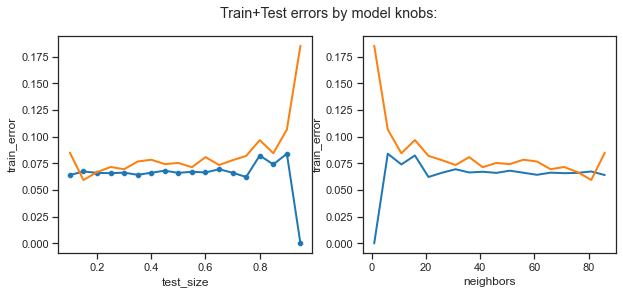

In [86]:
rows=1
cols=2
plt.figure(figsize = (12,15))
fig, axs = plt.subplots(rows,cols,figsize = (10,4))
alp = 0.2
fig.suptitle('Train+Test errors by model knobs:')

sns.lineplot(ax=axs[0], data=sumdf, y='train_error', x='test_size')
sns.scatterplot(ax=axs[0], data=sumdf, y='train_error', x='test_size')
sns.lineplot(ax=axs[0], data=sumdf, y='test_error', x='test_size')
sns.lineplot(ax=axs[1], data=sumdf, y='train_error', x='neighbors')
sns.lineplot(ax=axs[1], data=sumdf, y='test_error', x='neighbors')

<AxesSubplot:xlabel='test_size', ylabel='overall_error'>

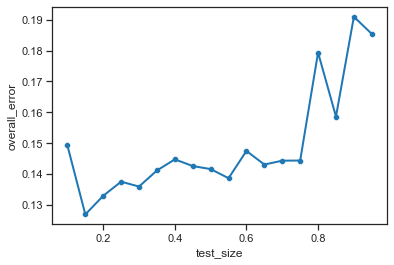

In [90]:
sns.lineplot(data=sumdf, x='test_size',y='overall_error')
sns.scatterplot(data=sumdf, x='test_size',y='overall_error')

In [ ]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [91]:
knn = set_knn_clf(X_columns=X_columns, y_column='f_win', data=df, n=100)
set_predictions(model=knn, data=df, X_columns=X_columns)
print(get_accuracy(y_column='f_win', data=df, data_set='test'))
print(get_accuracy(y_column='f_win', data=df, data_set='train'))

0.9164086687306502
0.9342257478102793


In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)
df = set_predictions(model=knn_clf, data=df, features=X_columns)
knn_clf

NameError: name 'X_train' is not defined

Accuracy = 0.9950
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1010
           1       1.00      1.00      1.00      1003

    accuracy                           1.00      2013
   macro avg       1.00      1.00      1.00      2013
weighted avg       1.00      1.00      1.00      2013



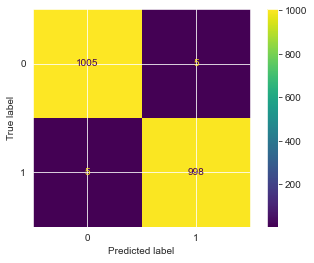

In [1012]:
from sklearn.metrics import ConfusionMatrixDisplay

model = knn_clf
print('Accuracy = %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred, labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
disp.plot()

In [93]:
print('Model miss-classifications:')
df[(df['f_win']!=df['predicted']) & (df.set=='test')]

Model miss-classifications:


,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,f_win,set,predicted
56,Sean Sherk,Nick Diaz,2006-04-15,Welterweight,U-DEC:,-0.001214,-0.693633,0.411131,-2.530849,1.587077,0.493592,-0.129458,-0.559407,-2.228587,-0.557484,-0.684131,-0.340580,-1.103479,0.338876,0.022872,0.001609,1,test,0
222,Michael Bisping,Matt Hamill,2007-09-08,Light Heavyweight,S-DEC:,-0.001214,-0.355095,-2.353670,0.009864,-1.063948,0.319121,-0.931910,0.297467,0.409500,-0.314551,-0.659708,0.331177,-0.180473,0.497140,0.022872,0.001609,1,test,0
256,Raquel Pennington,Holly Holm,2020-01-18,Women's Bantamweight,U-DEC:,-0.001214,0.284364,0.411131,0.009864,0.178024,0.074863,-0.497249,0.583092,0.441057,0.900112,0.262260,0.499116,-1.103479,0.061913,0.596560,-1.076104,0,test,1
260,Roxanne Modafferi,Maycee Barber,2020-01-18,Women's Flyweight,U-DEC:,1.353333,0.096288,0.411131,-0.837040,0.150177,-0.308972,-1.199394,0.011842,-0.669717,-1.853125,1.874177,-0.172641,0.856780,-0.630493,-1.698191,1.079323,1,test,0
275,Ramsey Nijem,Andrew Holbrook,2015-07-25,Lightweight,S-DEC:,-0.001214,0.321979,2.385989,-1.683945,2.511594,1.540413,1.508880,-0.940240,0.542036,-0.395529,-0.836775,0.667055,-1.103479,-0.986588,0.022872,1.079323,0,test,1
312,Sam Stout,Spencer Fisher,2006-03-04,Lightweight,S-DEC:,-0.001214,0.321979,-1.563726,-2.530849,-0.000196,0.284227,0.572687,-0.654615,0.636704,-1.205304,0.646922,-0.592489,-1.103479,0.655404,-1.124503,0.001609,1,test,0
519,Sam Stout,Matt Wiman,2009-04-18,Lightweight,U-DEC:,1.353333,0.585286,-1.563726,-1.683945,-0.813326,0.039969,0.706429,-1.321073,0.636704,-1.772147,0.317212,0.499116,-0.180473,-0.274398,0.022872,1.079323,1,test,0
531,Jorge Masvidal,Al Iaquinta,2015-04-04,Lightweight,S-DEC:,-0.001214,1.036669,0.016160,0.009864,0.473201,1.435731,0.004284,0.107051,0.037139,0.657179,-0.891726,0.247207,-0.180473,-0.135917,0.022872,0.001609,0,test,1
552,Robert Whiteford,Daniel Pineda,2014-03-15,Featherweight,U-DEC:,-0.001214,0.058672,1.596046,-2.530849,0.289411,0.284227,0.104590,-1.511489,-0.638161,-0.152596,-0.592545,1.422782,1.722088,0.141045,0.022872,0.001609,1,test,0
827,Iuri Alcantara,Luke Sanders,2017-03-04,Bantamweight,SUB:Kneebar,-0.001214,-2.687241,0.016160,0.856768,0.428646,1.121685,-0.396942,0.583092,-2.449480,-0.557484,-0.958890,-0.088672,-0.347260,0.378442,0.022872,0.001609,1,test,0


# <span style='color:orange'> **[in-progress]** </span> Feature's Ranking:
permutate each feature to see its effect on model accuracy

## <span style='color:orange'> **[in-progress]** </span> Career statistics importance(=most important features):

In [1101]:
from sklearn.tree import DecisionTreeClassifier

career_stats_features = ['f_win_perc','o_win_perc','f_win_strk','o_win_strk','f_lose_strk','o_lose_strk']
tree_depth = int(len(career_stats_features)/2) #number of features

tree_clf = DecisionTreeClassifier(max_depth=tree_depth, random_state=1)
X_train = data[df.columns[5:len(df.columns)-3]][data.set=='train']
y_train = np.int64(data.f_win[data.set=='train'])
tree_clf.fit(X_train,y_train)
tree_clf

DecisionTreeClassifier(max_depth=3, random_state=1)

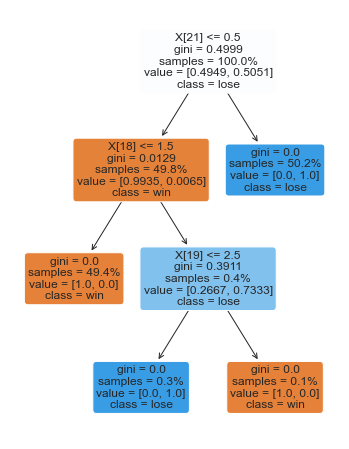

In [1113]:
import matplotlib.pyplot as plt
from sklearn import tree 

fig = plt.figure(figsize=(6, 8))

tree.plot_tree(tree_clf,
               #feature_names = career_stats_features, 
               class_names= ['win','lose'],
               max_depth= tree_depth,
               rounded=True, 
               filled = True,
               proportion = True, 
               precision = 4,
               impurity = True,
               fontsize=12
              );

## <span style='color:orange'> **[in-progress]** </span> Fighter's statistics importance:

In [1089]:
def get_model_acc(data=rank_df):
    
    from sklearn.neighbors import KNeighborsClassifier

    knn_clf=KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
    X_train = data[df.columns[5:len(df.columns)-3]][data.set=='train']
    y_train = np.int64(data.f_win[data.set=='train'])
    knn_clf.fit(X_train,y_train)
    
    X_test = data[df.columns[5:len(df.columns)-3]][data.set=='test']
    y_test = np.int64(data.f_win[data.set=='test'])
    y_pred = knn_clf.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [1090]:
y_train = np.int64(data.f_win[data.set=='train'])
y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [1091]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [1092]:
rank_df = (df[df.columns[5:]]).copy()
rank_df.head()

,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_win,set,predicted
0,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0,0,test,0
1,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1,1,train,1
2,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1,1,train,1
3,-0.891693,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2,1,test,1
4,-1.176629,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0,0,train,0


In [1099]:
rank_df = (df[df.columns[5:]]).copy()
features = rank_df.columns[0:len(rank_df)-2]
original_score = accuracy_score(y_test, y_pred)
original_df = rank_df.copy()

for index in range(0, len(features)-1):
    rank_df = original_df
    rank_df[features[index]] = np.random.permutation(rank_df[features[index]])
    acc = get_model_acc(data=rank_df)
    delta = original_score - acc
    print('permutate: %s, accuracy= %.5f, delta= %.5f' %(features[index], acc, delta))

permutate: norm_f_td avg., accuracy= 0.99603, delta= -0.00099
permutate: norm_f_td acc., accuracy= 0.99603, delta= -0.00099
permutate: norm_f_td def., accuracy= 0.99603, delta= -0.00099
permutate: norm_o_td avg., accuracy= 0.99503, delta= 0.00000
permutate: norm_o_td acc., accuracy= 0.99404, delta= 0.00099
permutate: norm_o_td def., accuracy= 0.99503, delta= 0.00000
permutate: f_sub. avg., accuracy= 0.99404, delta= 0.00099
permutate: norm_f_sub. avg., accuracy= 0.99305, delta= 0.00199
permutate: norm_o_sub. avg., accuracy= 0.99454, delta= 0.00050
permutate: norm_f_slpm, accuracy= 0.99553, delta= -0.00050
permutate: norm_o_slpm, accuracy= 0.99404, delta= 0.00099
permutate: norm_f_str. acc., accuracy= 0.99354, delta= 0.00149
permutate: norm_o_str. acc., accuracy= 0.99503, delta= 0.00000
permutate: norm_f_str. def, accuracy= 0.99603, delta= -0.00099
permutate: norm_o_str. def, accuracy= 0.99603, delta= -0.00099
permutate: stance_win_ratio, accuracy= 0.99702, delta= -0.00199
permutate: f_w

In [1040]:
column_name = rank_df.columns[0]
rank_df[column_name] = np.random.permutation(rank_df[column_name])
get_model_acc(data=rank_df)


0.9950322901142573

In [855]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

SyntaxError: invalid syntax (1931014809.py, line 1)

In [516]:
def get_log_model_acc(X, y, test_size=0.3):
    
    '''return logistic regression model accuracy(=correct predictions/all predictions)'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    logreg = LogisticRegression(random_state=1).fit(X, y)
    y_pred = logreg.predict(X_test)
    
    return accuracy_score(y_test, y_pred)

In [517]:
rank_df = (df[df.columns[6:]]).copy()
rank_df['result'] = df['result']

rank_df.head()

,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,result
0,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0,lose
1,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1,win
2,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1,win
3,-0.891693,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2,win
4,-1.176629,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0,lose


In [518]:
perm_column = rank_df.columns[0]

X = rank_df[rank_df.columns[0:len(rank_df.columns)-1]]
y = rank_df['result']
original_acc = get_log_model_acc(X=X, y=y, test_size=0.3)
print('+column<%s> accuracy = %f' %(perm_column,original_acc))
rank_df.head()

+column<norm_f_td avg.> accuracy = 1.000000


,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,result
0,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0,lose
1,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1,win
2,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1,win
3,-0.891693,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2,win
4,-1.176629,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0,lose


In [519]:
rank_df[perm_column] = np.random.permutation(rank_df[perm_column])
X = rank_df[rank_df.columns[0:len(rank_df.columns)-1]] 
perm_acc = get_log_model_acc(X=X, y=y, test_size=0.3)

print('-column<%s> accuracy = %f' %(perm_column,perm_acc))
print('column<%s> importance = %f' %(perm_column,original_acc-perm_acc))
rank_df.head()

-column<norm_f_td avg.> accuracy = 1.000000
column<norm_f_td avg.> importance = 0.000000


,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,result
0,4.429678,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0,lose
1,1.079755,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1,win
2,-0.629860,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1,win
3,1.233775,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2,win
4,-0.298718,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0,lose


In [520]:
log_df = pd.DataFrame(columns=['num_of_features','accuracy','features'])

first_column = 6

i = 0
for current_column in range(first_column, len(df.columns)-1):
    column_list = list(df.columns[current_column:len(df.columns)-1])
    log_df.loc[i,'features'] = column_list
    log_df.loc[i,'accuracy'] = get_log_model_acc(X=log_df[column_list], test_size=0.3)
    log_df.loc[i,'num_of_features'] = len(column_list)
    i += 1

log_df.head(20)

KeyError: "None of [Index(['norm_f_td avg.', 'norm_f_td acc.', 'norm_f_td def.', 'norm_o_td avg.',\n       'norm_o_td acc.', 'norm_o_td def.', 'f_sub. avg.', 'norm_f_sub. avg.',\n       'norm_o_sub. avg.', 'norm_f_slpm', 'norm_o_slpm', 'norm_f_str. acc.',\n       'norm_o_str. acc.', 'norm_f_str. def', 'norm_o_str. def',\n       'stance_win_ratio', 'f_win_perc', 'o_win_perc', 'f_win_strk',\n       'o_win_strk', 'f_lose_strk'],\n      dtype='object')] are in the [columns]"